In [2]:
import numpy as np
import pandas as  pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score



In [3]:
data=pd.read_csv('cardekho.csv')

In [4]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [6]:
np.random.seed(0)

In [7]:
x=data['km_driven']
y=data['selling_price']

In [8]:
x

0        70000
1        50000
2       100000
3        46000
4       141000
         ...  
4335     80000
4336     80000
4337     83000
4338     90000
4339     40000
Name: km_driven, Length: 4340, dtype: int64

In [9]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [10]:
data.shape

(4340, 8)

In [11]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [12]:
data.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [14]:
x_train

66       92000
188      70000
219      54000
2034     24000
835      80000
         ...  
1033     58500
3264    110000
1653     22000
2607     70000
2732     62000
Name: km_driven, Length: 3255, dtype: int64

In [15]:
y_train

66       525000
188      650000
219      235000
2034    1250000
835      900000
         ...   
1033    1300000
3264     120000
1653     270000
2607     600000
2732     229999
Name: selling_price, Length: 3255, dtype: int64

In [16]:
x_test

2089     70070
1077     86000
1495    120000
555      30000
2615     95000
         ...  
249      32000
3540     60000
3247     90000
535      21000
509     125531
Name: km_driven, Length: 1085, dtype: int64

In [17]:
y_test

2089     465000
1077    1580000
1495     150000
555     4950000
2615     125000
         ...   
249      500000
3540     465000
3247     350000
535      295000
509      600000
Name: selling_price, Length: 1085, dtype: int64

In [18]:
x1 = x_train.to_numpy()
y1= y_train.to_numpy()
data1 = LinearRegression().fit(x1.reshape(-1, 1), y1.reshape(-1, 1))
data1

LinearRegression()

In [19]:
data1.predict(np.array([[75000]]))

array([[478799.15209672]])

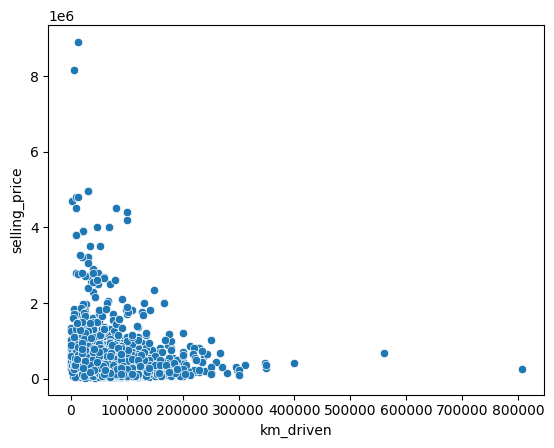

In [20]:
sns.scatterplot(x=x_train,y=y_train)
A=x_test.to_numpy()
B=y_test.to_numpy()


In [21]:
data2=data1.predict(x_test.to_numpy().reshape(-1,1))
data2

array([[489874.62050004],
       [454087.1536309 ],
       [377704.61291835],
       ...,
       [445100.9723706 ],
       [600112.59911077],
       [365278.97078067]])

<Axes: xlabel='km_driven', ylabel='selling_price'>

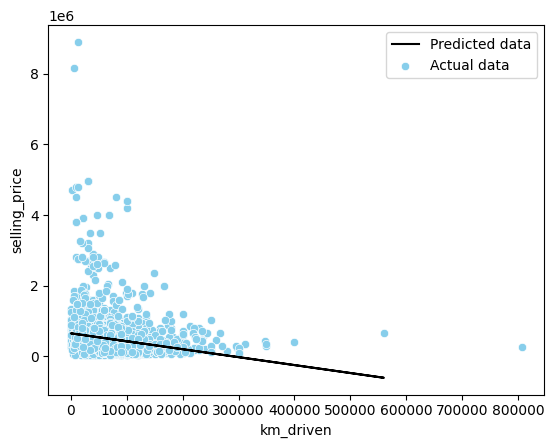

In [22]:
plt.plot(A,data2,color='black',label='Predicted data')
sns.scatterplot(x=x_train,y=y_train,color='skyblue',label='Actual data')

In [23]:
mean_squared_error(x_test,data2)

np.float64(213562905457.86917)

In [24]:
mean_absolute_error(x_test,data2)

np.float64(443139.28275050974)

In [25]:
r2_score(x_test,data2)

-105.26250313890709